# Network Analysis of ERP-SCANR Data

Words, words, words. 

In [11]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

import networkx as nx


from lisc.utils import SCDB, load_object


# ERP-SCANR code
#from erpsc.core.io import load_pickle_obj

In [12]:
# Set the name of the file to load
name = 'test' # 'erps', 'test'

In [13]:
# Set the file locations
db = SCDB('../data/')

In [14]:
# Load data
words = load_object('words_' + name, directory=db, reload_results=True)

In [15]:
# Functions to rescale edge weight to a new range for plotting
# From here: http://stackoverflow.com/questions/929103/convert-a-number-range-to-another-range-maintaining-ratio
def scale_number(unscaled, to_min, to_max, from_min, from_max):
    return (to_max-to_min)*(unscaled-from_min)/(from_max-from_min)+to_min

def scale_list(l, to_min, to_max):
    return [scale_number(i, to_min, to_max, min(l), max(l)) for i in l]

In [18]:
# ?
overlaps = np.zeros(shape=(words.n_terms, words.n_terms))
erps = words.result_keys

for i, ei in enumerate(words.result_keys):
    for j, ej in enumerate(words.result_keys):
        overlaps[i, j] = len(set(words[ei].ids) & set(words[ej].ids))

AttributeError: 'Words' object has no attribute 'result_keys'

In [17]:
words.n_terms

2

In [41]:
X = nx.Graph()

X = nx.Graph()
for i, erp in enumerate(erps):
    if erp is '270':
        continue
    X.add_node(i)
    X.node[i]['label'] = erp

for i in range(words.n_erps):
    for j in range(words.n_erps):
        if overlaps[i, j] > 0:
            X.add_edge(i, j, weight=overlaps[i, j])

X.remove_node(80)

In [42]:
# Plotting Settings for all network plots
f_size = (12, 8)
alpha = 0.9
node_size = 100
#width = 0.25  # For unweighted graphs

In [43]:
# Get stuff for plotting
weights = [X[u][v]['weight'] for u,v in X.edges()]
widths = scale_list(weights, 0.5, 5)

labels = {i : X.node[i]['label'] for i in X.nodes()}

pos = nx.spring_layout(X)

{0: Text(0.0271043,-0.0330032,'P100'),
 1: Text(0.00280601,-0.0431807,'P150'),
 2: Text(0.0421427,-0.0602158,'P180'),
 3: Text(0.0171146,-0.0306202,'P200'),
 4: Text(0.0108244,-0.0697607,'P220'),
 5: Text(-0.00534029,-0.07467,'P240'),
 6: Text(0.00929891,-0.0478924,'P250'),
 7: Text(0.00410543,-0.083528,'P270'),
 8: Text(0.0139753,-0.019191,'P300'),
 9: Text(0.0231448,-0.010125,'P3a'),
 10: Text(0.018356,-0.0100185,'P3b'),
 11: Text(0.0312188,0.0307894,'P340'),
 12: Text(-0.0100183,-0.0463712,'P350'),
 13: Text(-0.0026153,-0.0183222,'P400'),
 14: Text(-0.00528928,-0.0612769,'P500'),
 15: Text(-0.0433977,-0.0304,'P550'),
 16: Text(-0.83797,0.665411,'P600'),
 17: Text(0.0379573,-0.0422058,'N75'),
 18: Text(0.0433792,-0.0515128,'N80'),
 19: Text(0.04499,-0.068869,'N90'),
 20: Text(0.0208794,-0.0285735,'N100'),
 21: Text(0.036132,-0.0930838,'N110'),
 22: Text(0.0239281,-0.0587508,'N120'),
 23: Text(0.039113,-0.0757119,'N130'),
 24: Text(0.0357829,-0.0308288,'N140'),
 25: Text(0.0162246,-0.

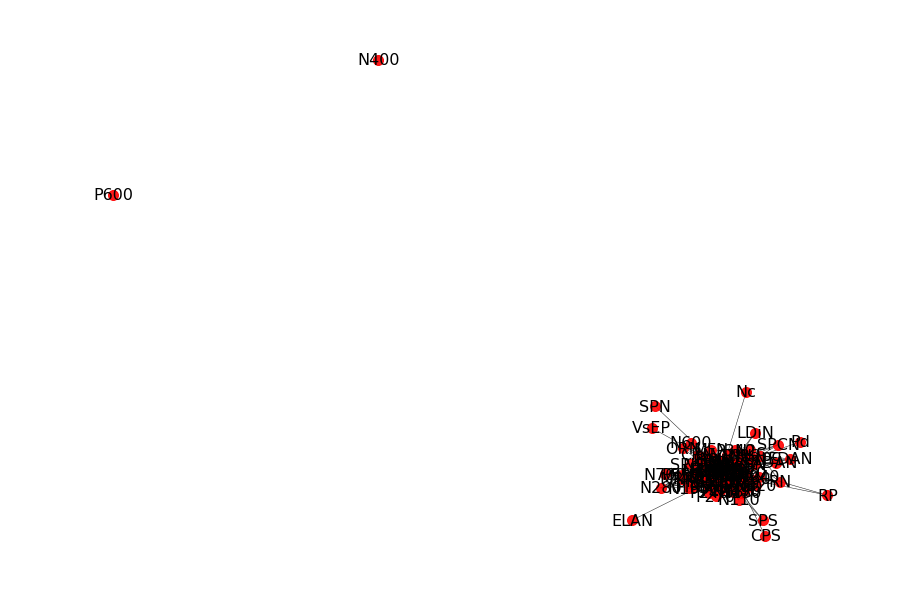

In [45]:
# Plot the ERP network
plt.figure(figsize=f_size)
nx.draw(X, pos=pos, node_size=node_size, alpha=alpha, width=widths)
nx.draw_networkx_labels(X, pos, labels=labels, font_size=16)
#plt.savefig('network.svg', transparent=True)

In [31]:
#
centers = nx.center(X)
erp_centers = [labels[i] for i in centers]

NetworkXError: Found infinite path length because the graph is not connected

In [10]:
degs = X.degree()

In [11]:
nx.average_node_connectivity(X)

0.0

In [ ]:
nx.average_clustering(X)

In [49]:
a = nx.degree(X)
print(np.mean(list(a.values())))

AttributeError: 'DegreeView' object has no attribute 'values'

In [ ]:
X.node[8]

In [ ]:
X.node[70]

In [32]:
bb = np.array(list(a.values())) > 49
high = [i for i, x in enumerate(bb) if x]
for h in high:
    print(X.node[h])

NameError: name 'a' is not defined

In [48]:
qq = words['N400']
qq.

TypeError: 'list' object is not callable